In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection, naive_bayes, svm
import string
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("dataset.csv")
#DataFlair - Get the labels
labels=df.label
labels.head()

0    False
1     True
2     True
3     True
4     True
Name: label, dtype: bool

In [3]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['finaltext'], labels, test_size=0.2, random_state=7)

In [4]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train).toarray()
tfidf_test=tfidf_vectorizer.transform(x_test).toarray()

C:\Users\Monique\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:xlabel='term'>

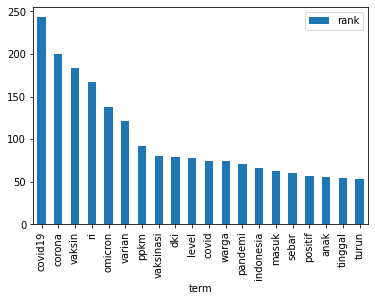

In [5]:
terms = tfidf_vectorizer.get_feature_names()
# sum tfidf frequency of each term through documents
sums = tfidf_train.sum(axis=0)
# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append((term, sums[col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])
ranking.sort_values('rank', ascending=False)[:20].plot.bar(x='term', y='rank')


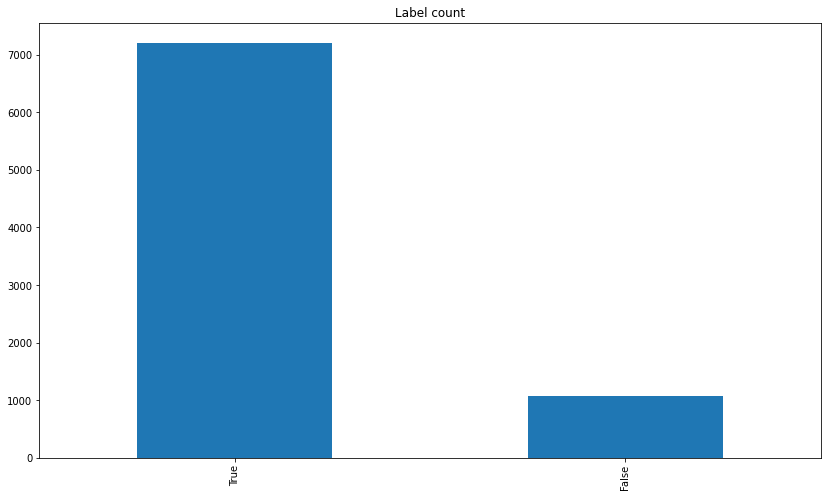

In [12]:
ax = df['label'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Label count")

In [13]:
df['label'].value_counts()

True     7200
False    1075
Name: label, dtype: int64

In [8]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 101)
X_oversample, y_oversample = smote.fit_resample(tfidf_train, y_train)
y_oversample

0         True
1         True
2         True
3         True
4         True
         ...  
11543    False
11544    False
11545    False
11546    False
11547    False
Name: label, Length: 11548, dtype: bool

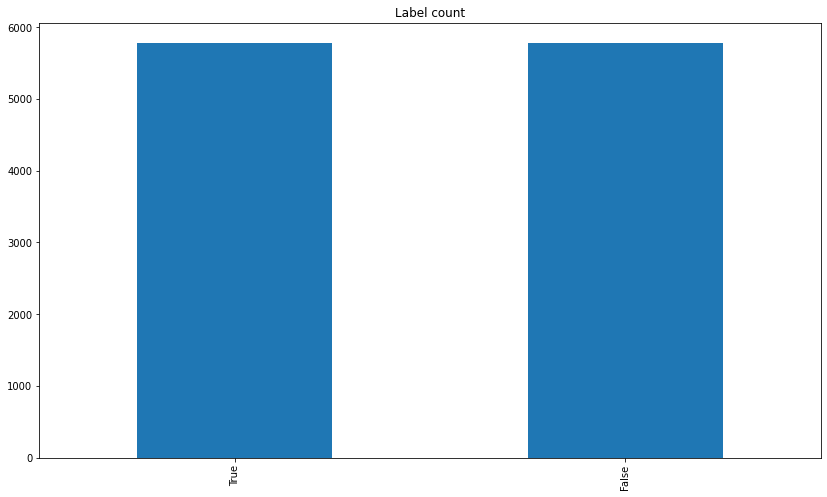

In [9]:
oversample_df = pd.DataFrame(y_oversample)
ax = oversample_df['label'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Label count")

In [14]:
oversample_df['label'].value_counts()

True     5774
False    5774
Name: label, dtype: int64

In [10]:
mnb = MultinomialNB() 
mnb.fit(X_oversample, y_oversample)
pred = mnb.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print(f'Accuracy: {round(score*100,2)}%')
print(classification_report(y_test, pred))
#DataFlair - Build confusion matrix
cf_matrix = confusion_matrix(y_test,pred)

Accuracy: 91.42%
              precision    recall  f1-score   support

       False       0.65      0.84      0.73       229
        True       0.97      0.93      0.95      1426

    accuracy                           0.91      1655
   macro avg       0.81      0.88      0.84      1655
weighted avg       0.93      0.91      0.92      1655



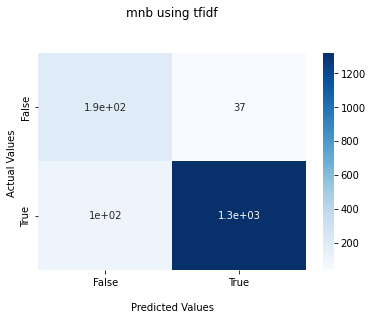

In [11]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('mnb using tfidf\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()